In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
from citipy import citipy

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [16]:
import requests
from config import weather_api_key

In [17]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wilmington
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | phuket
Processing Record 5 of Set 1 | mulege
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | zyryanka
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | west bay
Processing Record 11 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 12 of Set 1 | warrington
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | huarmey
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | beinamar
Processing Record 18 of Set 1 | wulanhaote
City not found. Skipping...
Processing Record 19 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1

Processing Record 38 of Set 4 | salta
Processing Record 39 of Set 4 | chicama
Processing Record 40 of Set 4 | krasnomayskiy
Processing Record 41 of Set 4 | batagay-alyta
Processing Record 42 of Set 4 | saint anthony
Processing Record 43 of Set 4 | marcona
City not found. Skipping...
Processing Record 44 of Set 4 | povenets
Processing Record 45 of Set 4 | north bend
Processing Record 46 of Set 4 | mercedes
Processing Record 47 of Set 4 | manzanillo
Processing Record 48 of Set 4 | butaritari
Processing Record 49 of Set 4 | thompson
Processing Record 50 of Set 4 | aklavik
Processing Record 1 of Set 5 | elko
Processing Record 2 of Set 5 | zhigansk
Processing Record 3 of Set 5 | manali
Processing Record 4 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 5 | santa eulalia del rio
City not found. Skipping...
Processing Record 6 of Set 5 | karratha
Processing Record 7 of Set 5 | iqaluit
Processing Record 8 of Set 5 | luan
Processing Record 9 of Set 5 | nanorta

Processing Record 24 of Set 8 | hlobyne
Processing Record 25 of Set 8 | santa catalina
Processing Record 26 of Set 8 | tabialan
City not found. Skipping...
Processing Record 27 of Set 8 | ngunguru
Processing Record 28 of Set 8 | palmer
Processing Record 29 of Set 8 | ambatofinandrahana
Processing Record 30 of Set 8 | santa cruz cabralia
Processing Record 31 of Set 8 | chiredzi
Processing Record 32 of Set 8 | yarada
Processing Record 33 of Set 8 | okha
Processing Record 34 of Set 8 | aswan
Processing Record 35 of Set 8 | maceio
Processing Record 36 of Set 8 | kalevala
Processing Record 37 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 38 of Set 8 | awjilah
Processing Record 39 of Set 8 | ayan
Processing Record 40 of Set 8 | ugoofaaru
Processing Record 41 of Set 8 | vila franca do campo
Processing Record 42 of Set 8 | hunza
City not found. Skipping...
Processing Record 43 of Set 8 | burica
City not found. Skipping...
Processing Record 44 of Set 8 | aflu
City not foun

Processing Record 9 of Set 12 | ust-ishim
Processing Record 10 of Set 12 | mandalgovi
Processing Record 11 of Set 12 | polson
Processing Record 12 of Set 12 | nampula
Processing Record 13 of Set 12 | puerto narino
Processing Record 14 of Set 12 | ballina
Processing Record 15 of Set 12 | shirokiy
Processing Record 16 of Set 12 | ampanihy
Processing Record 17 of Set 12 | sola
Processing Record 18 of Set 12 | playa del carmen
Processing Record 19 of Set 12 | marabba
Processing Record 20 of Set 12 | ixtapa
Processing Record 21 of Set 12 | saleaula
City not found. Skipping...
Processing Record 22 of Set 12 | shumskiy
Processing Record 23 of Set 12 | we
City not found. Skipping...
Processing Record 24 of Set 12 | gulshat
City not found. Skipping...
Processing Record 25 of Set 12 | port moresby
Processing Record 26 of Set 12 | talcahuano
Processing Record 27 of Set 12 | tempio pausania
Processing Record 28 of Set 12 | corinto
Processing Record 29 of Set 12 | half moon bay
Processing Record 30

In [20]:
print(len(city_data))

555


In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Wilmington,34.2257,-77.9447,66.94,46,0,5.75,US,2022-04-04 20:35:21
1,Bluff,-46.6000,168.3333,56.46,79,100,7.40,NZ,2022-04-04 20:37:14
2,Hobart,-42.8794,147.3294,55.26,81,75,16.11,AU,2022-04-04 20:40:20
3,Phuket,8.0000,98.2500,85.08,94,20,0.00,TH,2022-04-04 20:40:21
4,Mulege,26.8833,-111.9833,74.17,42,0,10.31,MX,2022-04-04 20:40:21
5,Ushuaia,-54.8000,-68.3000,42.42,81,40,26.46,AR,2022-04-04 20:37:48
6,Zyryanka,65.7500,150.8500,-3.32,97,100,6.08,RU,2022-04-04 20:40:22
7,Cape Town,-33.9258,18.4232,62.89,89,40,8.05,ZA,2022-04-04 20:37:10
8,Carnarvon,-24.8667,113.6333,71.67,88,0,11.50,AU,2022-04-04 20:40:23
9,West Bay,19.3667,-81.4167,86.07,66,20,4.61,KY,2022-04-04 20:40:23


In [22]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Wilmington,US,2022-04-04 20:35:21,34.2257,-77.9447,66.94,46,0,5.75
1,Bluff,NZ,2022-04-04 20:37:14,-46.6000,168.3333,56.46,79,100,7.40
2,Hobart,AU,2022-04-04 20:40:20,-42.8794,147.3294,55.26,81,75,16.11
3,Phuket,TH,2022-04-04 20:40:21,8.0000,98.2500,85.08,94,20,0.00
4,Mulege,MX,2022-04-04 20:40:21,26.8833,-111.9833,74.17,42,0,10.31
5,Ushuaia,AR,2022-04-04 20:37:48,-54.8000,-68.3000,42.42,81,40,26.46
6,Zyryanka,RU,2022-04-04 20:40:22,65.7500,150.8500,-3.32,97,100,6.08
7,Cape Town,ZA,2022-04-04 20:37:10,-33.9258,18.4232,62.89,89,40,8.05
8,Carnarvon,AU,2022-04-04 20:40:23,-24.8667,113.6333,71.67,88,0,11.50
9,West Bay,KY,2022-04-04 20:40:23,19.3667,-81.4167,86.07,66,20,4.61


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

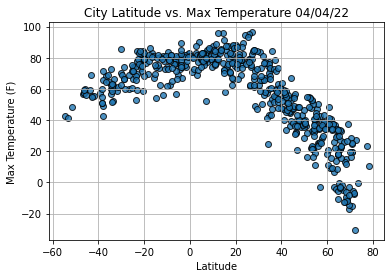

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

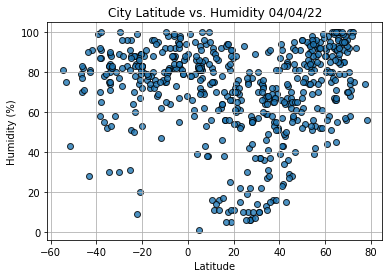

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

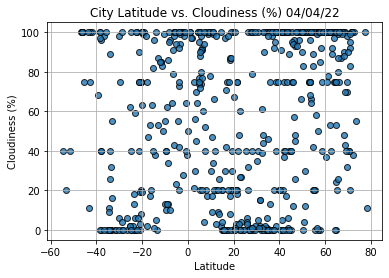

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

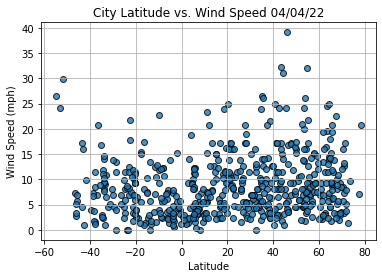

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()